<a href="https://colab.research.google.com/github/dyhwang7/CS4650/blob/main/project4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade pandas

In [3]:
pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 7.7 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


# WEEK 1: Data Set Up

Select companies that I am personally interested in that have large market share of their respective industries and have stable data to train my model. While I am interested, for the purposes of this study, I excluded companies that experienced abnormal volatility like TSLA, AMC, GME, because they are outliers and would not be a good train data set for the models. From research, it appears like LSTM is often recommended for predicting stock prices so I studied up on that and plan on building that to compare. 

In [28]:
import numpy as np
import pandas as pd
import pandas_datareader as web
from pandas.plotting import scatter_matrix
import datetime as dt
import matplotlib.pyplot as plt
import yfinance as yf

In [32]:
tickers = ['AAPL', 'FB', 'MSFT','V', 'DIS', 'NVDA']
data = []
start = dt.datetime(2018, 1, 1)
end = dt.datetime(2021, 11, 30)

for t in tickers:
  data.append(web.DataReader(t, 'yahoo', start, end))

for i in data:
  print(i)

                  High         Low  ...       Volume   Adj Close
Date                                ...                         
2018-01-02   43.075001   42.314999  ...  102223600.0   41.188164
2018-01-03   43.637501   42.990002  ...  118071600.0   41.180992
2018-01-04   43.367500   43.020000  ...   89738400.0   41.372280
2018-01-05   43.842499   43.262501  ...   94640000.0   41.843315
2018-01-08   43.902500   43.482498  ...   82271200.0   41.687893
...                ...         ...  ...          ...         ...
2021-11-23  161.800003  159.059998  ...   96041900.0  161.410004
2021-11-24  162.139999  159.639999  ...   69463600.0  161.940002
2021-11-26  160.449997  156.360001  ...   76959800.0  156.809998
2021-11-29  161.190002  158.789993  ...   88748200.0  160.240005
2021-11-30  165.520004  159.919998  ...  174048100.0  165.300003

[986 rows x 6 columns]
                  High         Low  ...    Volume   Adj Close
Date                                ...                      
2018-01

I will be using Adj Close as the standard for the daily stock price. Close seems like a better option than Open because Open does not include what happens on that given that obviously, and Adj Close accounts for corporate activity, etc so that it is a more accurate representation of the stock's value.  

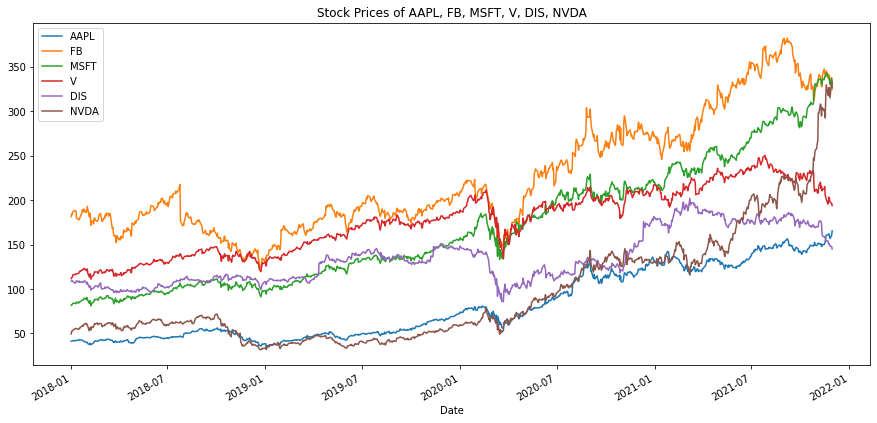

In [25]:
for index, val in enumerate(data):
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
plt.title('Stock Prices of ' + ', '.join(tickers))
plt.legend()

# WEEK 2: Basic Stock and Metrics Analysis 

As I am unfamiliar with the basics of stocks, I studied up on various ways of visualizing stocks and metrics that indcate the trends and values of stocks. 

First I start off by plotting the volume of each stock to observe the overall interest and activity of each stock. Here it appears like over the past 3 years, AAPL's volume trumps all the rest with NVDA at second and FB and MSFT fighting for third

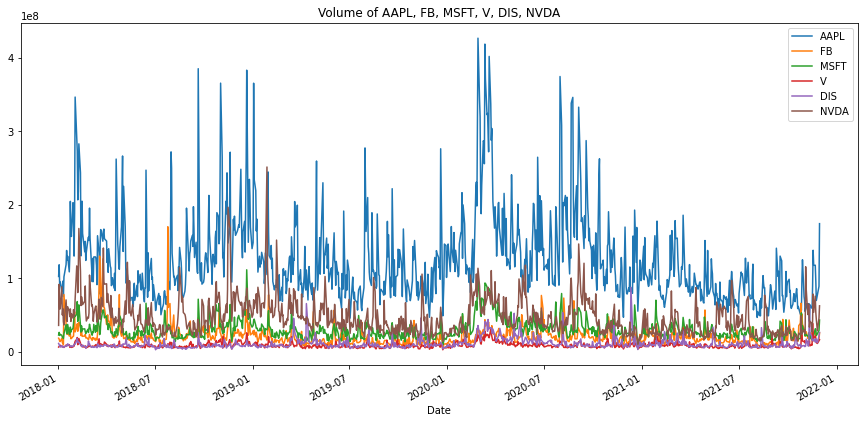

In [26]:
for index, val in enumerate(data):
  val['Volume'].plot(label=tickers[index], figsize=(15,7))
plt.title('Volume of ' + ', '.join(tickers))
plt.legend()

### Next, we plot a 6 x 6  scatter matrix of the 6 companies to observe the correlation between the stocks. As expected, tech companies like AAPL, FB, NVDA, and MSFT all seem very positively correlated with each combination forming a straight line. V and DIS do not exhibit a strong correlation with the rest, and DIS especially seems to lack correlation with the rest of the stocks. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3b84489d0>,
      dtype=object)

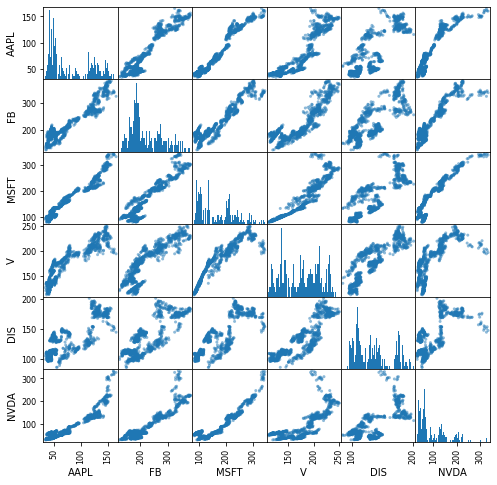

In [36]:
scatter_data = pd.concat([val['Adj Close'] for val in data],axis = 1)
scatter_data.columns = tickers

scatter_matrix(scatter_data, figsize = (8,8), hist_kwds= {'bins':250})

Next we observe the percentage increase in each stock's value throughout the past 3 years. This value is achieved by comparing a given day's price with the previous day's and creating a histogram of the percent difference data. Here Facebook seems to have the highest volatility, an its x range seems to be largest, and AAPL and NVDA appear to be the best performing when looking at positive side vs the negative side

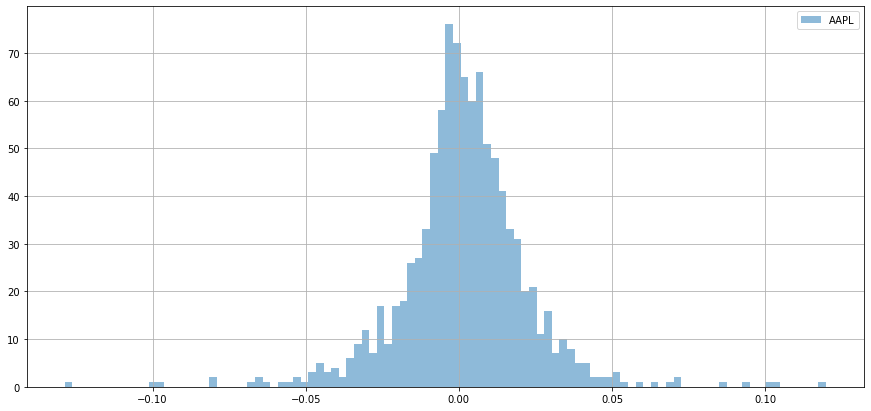

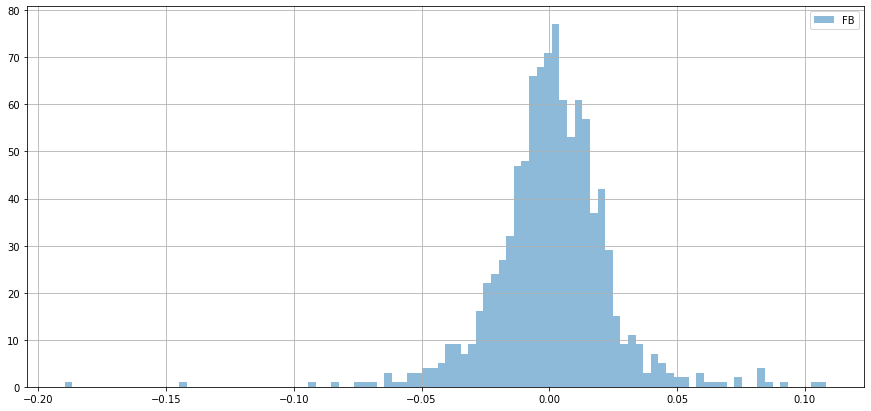

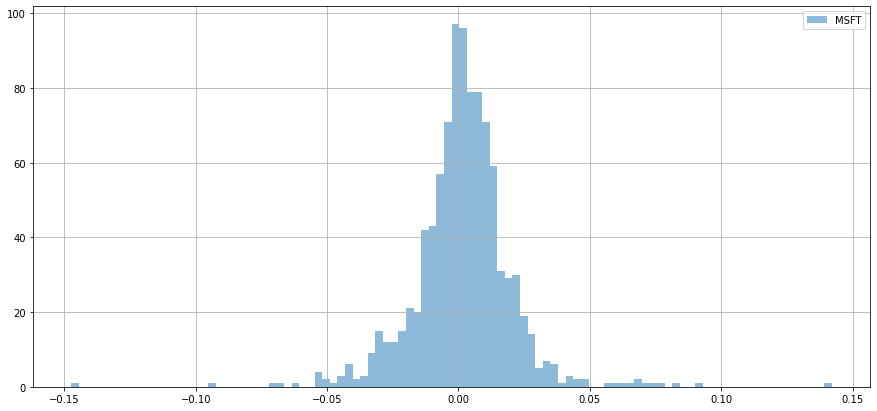

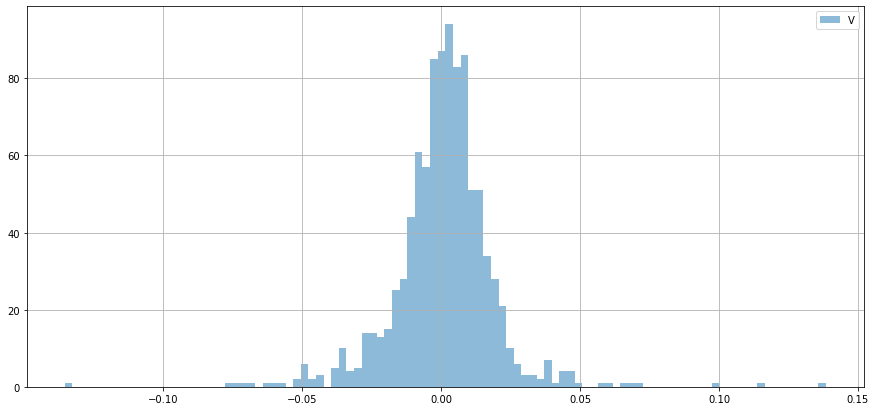

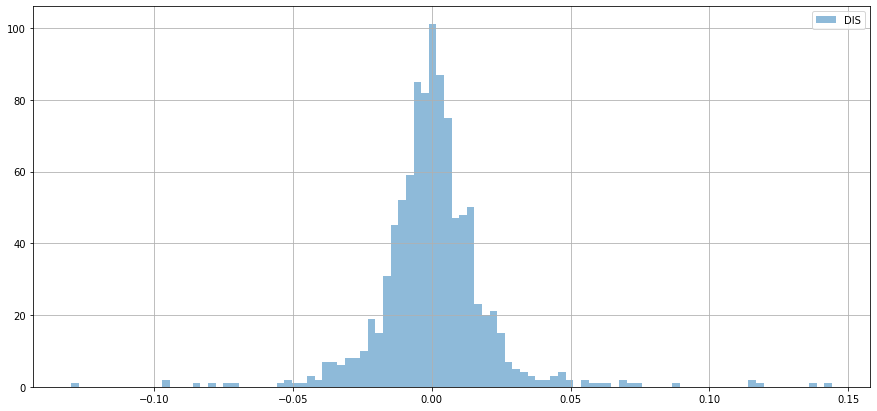

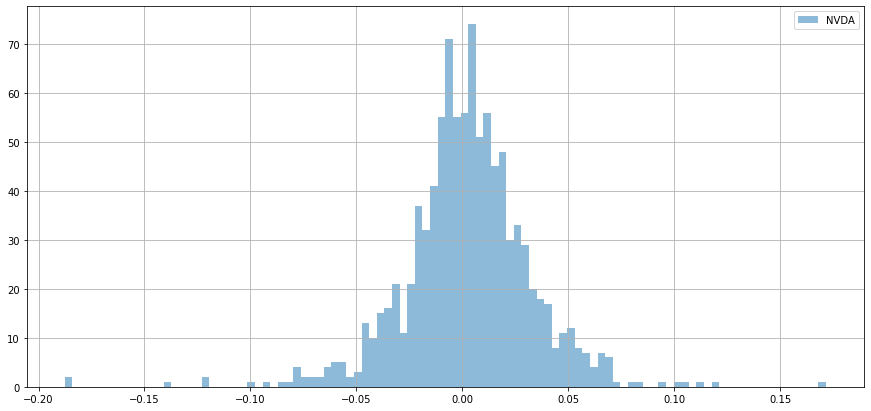

In [13]:
for index, val in enumerate(data):
  returns = (val['Adj Close']/val['Adj Close'].shift(1))-1
  returns.hist(bins = 100, label = tickers[index], alpha = 0.5, figsize = (15,7))
  plt.legend()
  plt.show()

Next we calculate the moving average data for each of the stocks and plot it over the 3 year window to observe trends. Rather than looking at each individual day's stock price, the moving average smoothes the line out by taking a look at the average of previous x number of days for the given day. The blue daily data fluctuates much more than the orange 50 moving average data, and the green 100 moving average data is much more stable than the rest. These provide us with an easy snapshot of the trend of the stock. 

Few interesting observations: When looking at the green data, they mostly rise over the past couple years due to the stock boom that resulted from COVID. Orange lines all trend up as well except for the noticeable dip around 03/2020 when COVID first broke in the US. While most recovered quickly, DIS expectedly took the hardest fall and took the longest to recover

As of recent, FB, V, and DIS seem to trend downward, while AAPL and MSFT are showing a strong positive trend with NVDA trending upward exponentially.

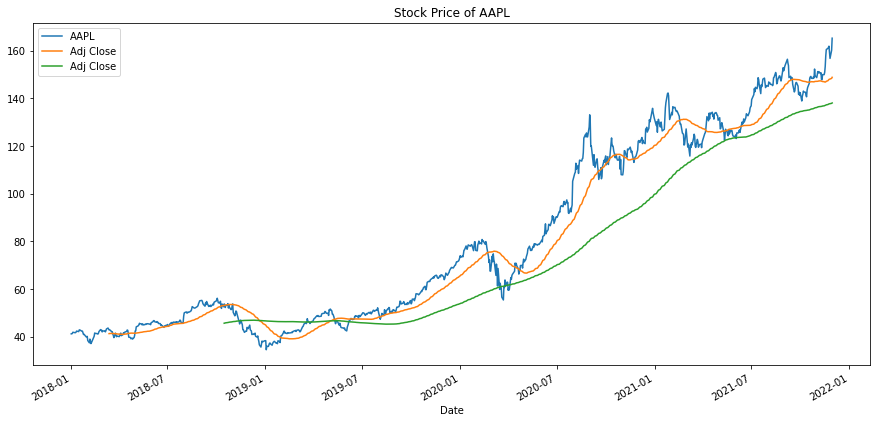

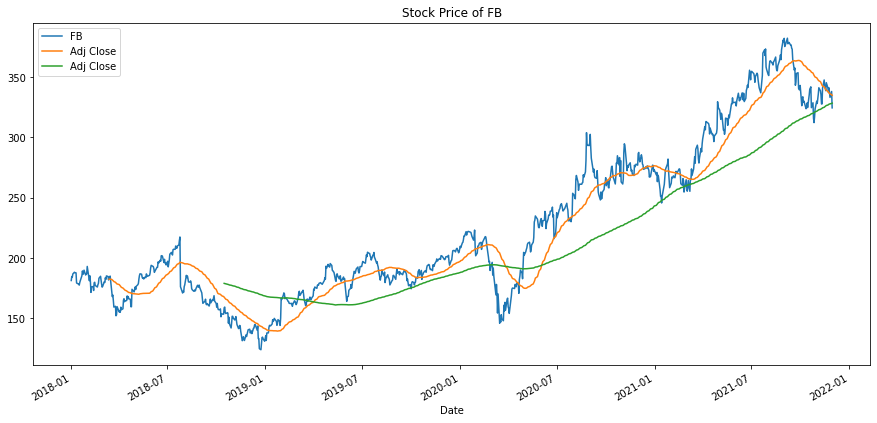

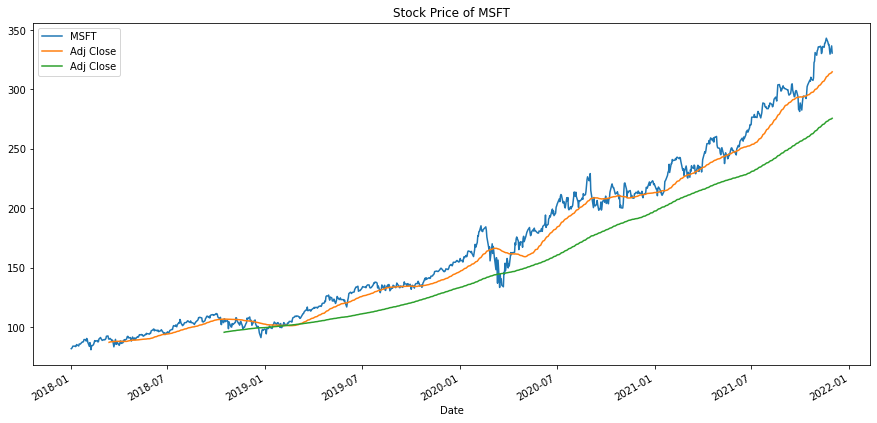

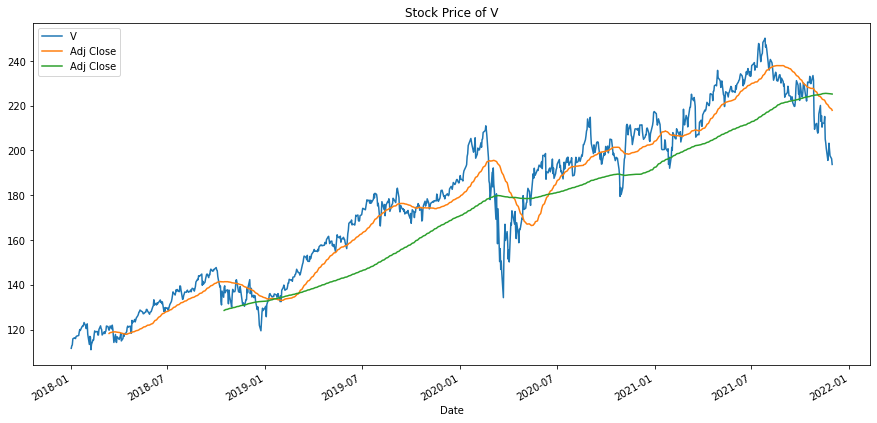

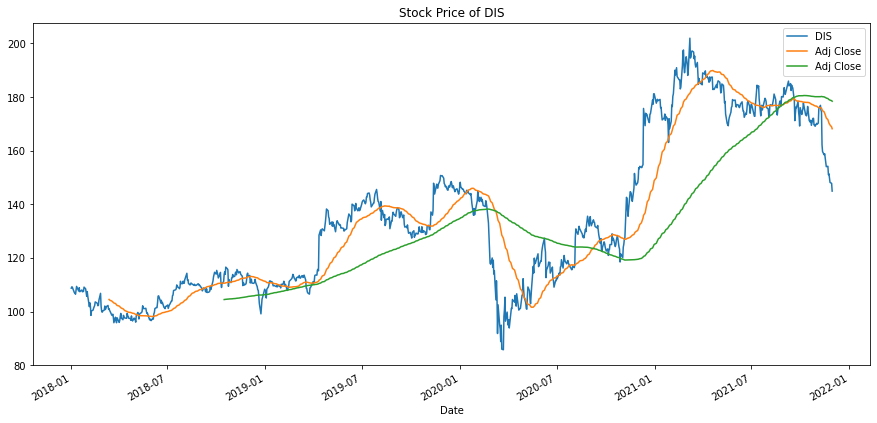

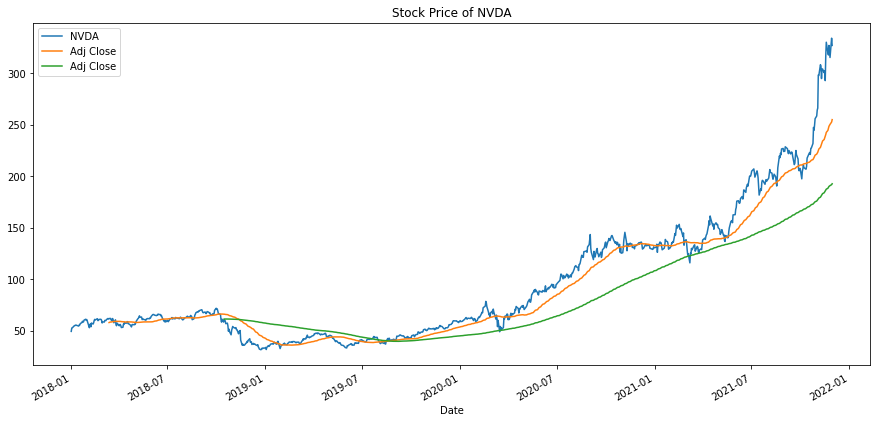

In [14]:
for index, val in enumerate(data):
  rolling_50 = val['Adj Close'].rolling(50).mean()
  rolling_200 = val['Adj Close'].rolling(200).mean()
  val['Adj Close'].plot(label=tickers[index], figsize=(15,7))
  rolling_50.plot()
  rolling_200.plot()
  plt.title('Stock Price of ' + tickers[index])
  plt.legend()
  plt.show()

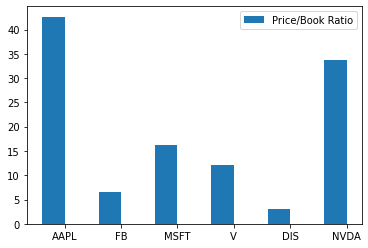

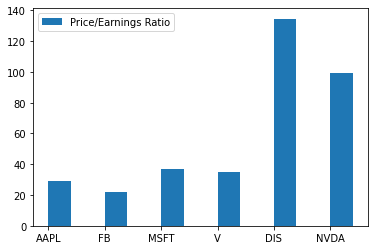

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

In [40]:
metric_data = []
for t in tickers:
  metric_data.append(yf.Ticker(t))

PB = []
PE = []


for i in metric_data:
  PB.append(i.info['priceToBook'])
  PE.append(i.info['regularMarketPrice']/i.info['trailingEps'])

X_axis = np.arange(len(tickers))

plt.bar(X_axis - 0.2, PB, 0.4, label = 'Price/Book Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()
plt.bar(X_axis + 0.2, PE, 0.4, label = 'Price/Earnings Ratio')
plt.xticks(X_axis, tickers)
plt.legend()
plt.show()

print(metric_data[0].info.keys())